# Example data integration and analysis for ArXiV metadata
## Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import datetime
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
sns.set(font_scale=1.5, style="whitegrid",rc={"lines.linewidth": 2.5})

In [3]:
def time_elapsed(start):
    end = datetime.datetime.now()

    time_to_run = end - start
    minutes = int(time_to_run.seconds/60)
    seconds = time_to_run.seconds % 60
    return "Total runtime: " + str(minutes) + " minutes, " + str(seconds) + " seconds"

In [4]:
start = datetime.datetime.now()


## Import data

There are two different folders for different slices of ArXiV: `per_category` and `per_year`. The easiest for getting the full dataset is to combine `per_year`.

Note: it is very important to specify the data types, particularly `arxiv_id`, as Pandas may assume they are floats based on some initial rows, when they are actually strings. 

In [5]:
dumpdate = "20190101"

In [6]:
datadir = "processed_data/" + dumpdate + "/per_year/"

In [7]:
files = glob.glob(datadir + "*.tsv.zip")
len(files)
files.sort()

In [8]:
dtypes = {
    "abstract": object,
    "acm_class": object,
    "arxiv_id": object,
    "author_text": object,
    "categories": object,
    "comments": object,
    "created": object,
    "doi": object,
    "num_authors": int,
    "num_categories": int,
    "primary_cat": object,
    "title": object,
    "updated": object,
    "created_ym": object
    }

In [9]:
df_all = pd.DataFrame()

for file in files:
    print(file)
    
    yearly_df = pd.read_csv(file,
                            sep="\t",
                            index_col=0,
                            compression='zip',
                            dtype=dtypes,
                            parse_dates=["created","updated"])
        
    df_all = df_all.append(yearly_df)
    
    print("Records this year: ", len(yearly_df), "Cumulative total: ", len(df_all), "\n")

processed_data/20190101/per_year/1993.tsv.zip
Records this year:  6728 Cumulative total:  6728 

processed_data/20190101/per_year/1994.tsv.zip
Records this year:  10085 Cumulative total:  16813 

processed_data/20190101/per_year/1995.tsv.zip
Records this year:  12994 Cumulative total:  29807 

processed_data/20190101/per_year/1996.tsv.zip
Records this year:  15875 Cumulative total:  45682 

processed_data/20190101/per_year/1997.tsv.zip
Records this year:  19621 Cumulative total:  65303 

processed_data/20190101/per_year/1998.tsv.zip
Records this year:  24174 Cumulative total:  89477 

processed_data/20190101/per_year/1999.tsv.zip
Records this year:  27694 Cumulative total:  117171 

processed_data/20190101/per_year/2000.tsv.zip
Records this year:  30672 Cumulative total:  147843 

processed_data/20190101/per_year/2001.tsv.zip
Records this year:  33128 Cumulative total:  180971 

processed_data/20190101/per_year/2002.tsv.zip
Records this year:  36103 Cumulative total:  217074 

processe

### Checking merged dataframe

In [10]:
len(df_all)

1480220

In [11]:
df_all = df_all.drop_duplicates()
len(df_all)

1480220

In [12]:
df_all.sample(2).transpose()

,886575,688441
abstract,We consider a class of models of neutrino mixi...,Connected two-point field strength correlators...
acm_class,NaN,NaN
arxiv_id,1803.11009,0906.1340
author_text,"J. T. Penedo, S. T. Petcov, A. V. Titov","V. D. Orlovsky, V. I. Shevchenko"
categories,hep-ph,"hep-lat,hep-ph"
comments,"Poster presented at NuPhys2017 (London, 20-22 ...","11 pages, 9 figures, to be published in JETP L..."
created,2018-03-29 00:00:00,2009-06-07 00:00:00
doi,NaN,10.1134/S002136400914001X
num_authors,3,2
num_categories,1,2


## Analysis variables

### Adding timestamp variable

In [13]:
df_all['created_ts'] = pd.to_datetime(df_all.created)
df_all['updated_ts'] = pd.to_datetime(df_all.updated)

In [14]:
def has_colon(title):
    if title.find(":") == -1:
        return 0
    else:
        return 1

In [15]:
df_all['has_colon_title'] = df_all.title.apply(has_colon)

In [16]:
df_all.has_colon_title.value_counts()

0    1303090
1     177130
Name: has_colon_title, dtype: int64

In [17]:
def has_doi(doi):
    if doi is np.nan:
        return 0
    else:
        return 1

In [18]:
df_all['has_doi'] = df_all.doi.apply(has_doi)

In [19]:
df_all['title_len'] = df_all.title.apply(len)

In [20]:
df_all['abs_len'] = df_all.abstract.apply(len)

In [21]:
def word_count(string):
    return len(string.split(" "))

In [22]:
df_all['title_words'] = df_all.title.apply(word_count)
df_all['abs_words'] = df_all.abstract.apply(word_count)

In [23]:
df_all['chars_per_word_title'] = df_all.title_len/df_all.title_words
df_all['chars_per_word_abs'] = df_all.abs_len/df_all.abs_words

In [24]:
df_all['abs_title_ratio_chars'] = df_all.abs_len/df_all.title_len

# Analyses

In [26]:
df_all.set_index("created_ts", inplace=True, drop=False)

In [27]:
df_all.sample(2).transpose()

created_ts,2012-04-24 00:00:00,2000-03-24 00:00:00
abstract,"""Pure"" homogeneous linear supermultiplets (min...",The total cross section for p-d breakup is stu...
acm_class,NaN,NaN
arxiv_id,1204.5506,nucl-th/0003054
author_text,"Marcelo Gonzales, Kevin Iga, Sadi Khodaee, Fra...","A. Kievsky, C. R. Brune, M. Viviani"
categories,"hep-th,math-ph,math.MP",nucl-th
comments,"20 pages, 5 figures. Two references added","12 pages, 5 figures, to be published in Physic..."
created,2012-04-24 00:00:00,2000-03-24 00:00:00
doi,10.1063/1.4755834,10.1016/S0370-2693(00)00415-9
num_authors,4,3
num_categories,3,1


Text(0.5, 0, 'Number of authors')

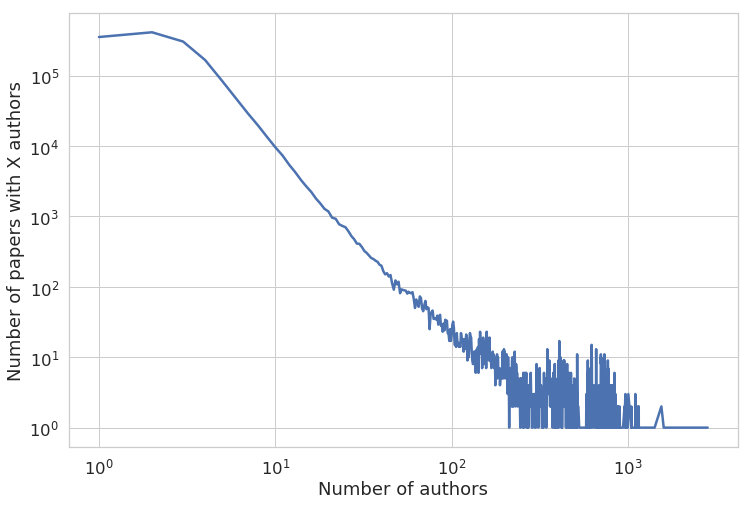

In [25]:
num_authors_counts = df_all.num_authors.value_counts().sort_index()
fig = num_authors_counts.plot(kind='line', 
                              logy=True, 
                              logx=True, 
                              figsize=[12,8])

fig.set_ylabel("Number of papers with X authors")
fig.set_xlabel("Number of authors")

In [28]:
df_all.set_index("updated_ts", inplace=True, drop=False)

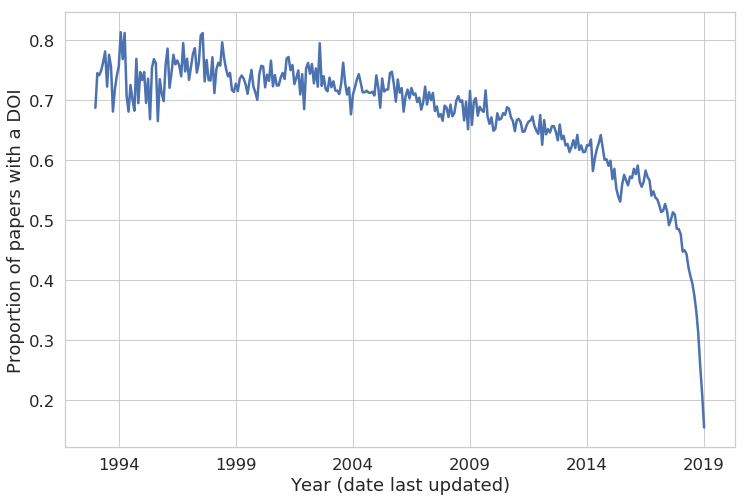

In [29]:
fig = df_all.groupby(pd.Grouper(freq='M')).has_doi.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Proportion of papers with a DOI")
l = fig.set_xlabel("Year (date last updated)")

In [30]:
df_all.set_index("created_ts", inplace=True, drop=False)

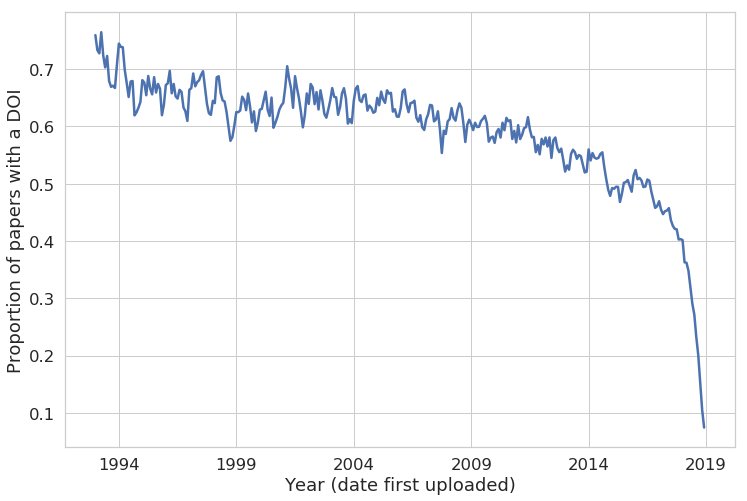

In [31]:
fig = df_all.groupby(pd.Grouper(freq='M')).has_doi.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Proportion of papers with a DOI")
l = fig.set_xlabel("Year (date first uploaded)")

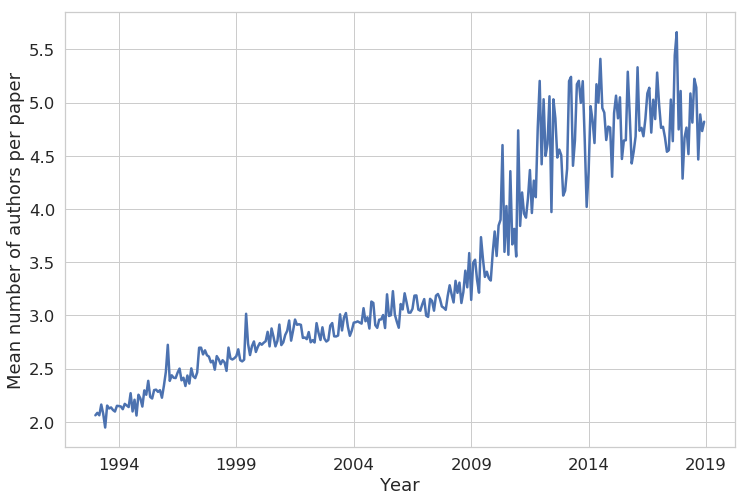

In [32]:
fig = df_all.groupby(pd.Grouper(freq='M')).num_authors.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean number of authors per paper")
l = fig.set_xlabel("Year")

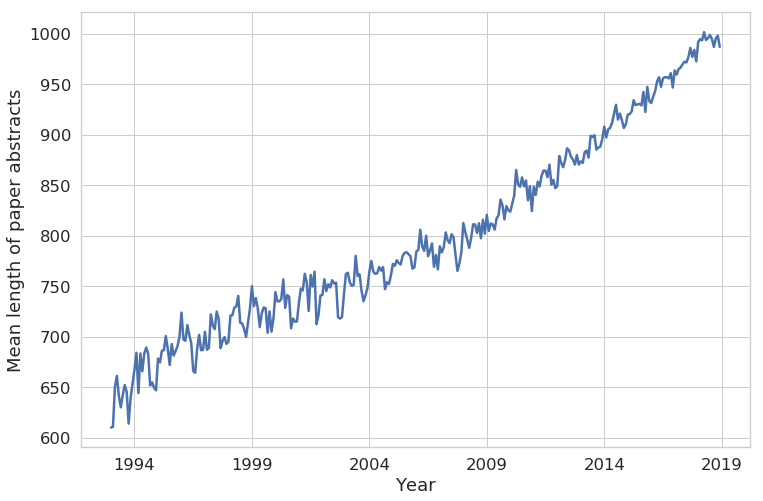

In [33]:
fig = df_all.groupby(pd.Grouper(freq='M')).abs_len.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean length of paper abstracts")
l = fig.set_xlabel("Year")


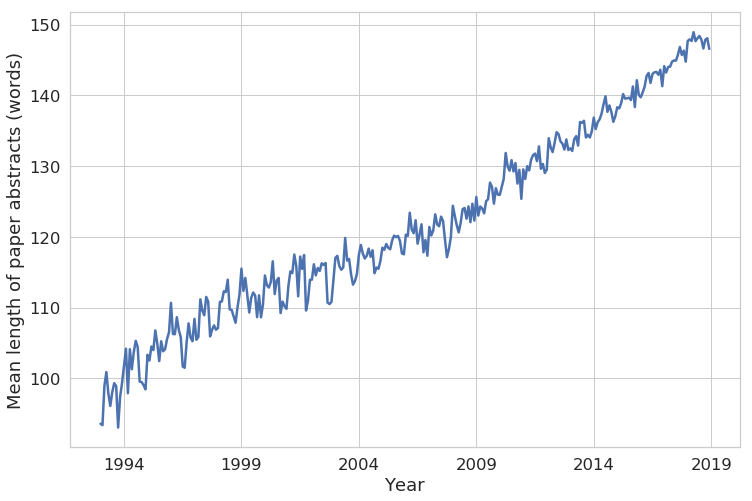

In [34]:
fig = df_all.groupby(pd.Grouper(freq='M')).abs_words.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean length of paper abstracts (words)")
l = fig.set_xlabel("Year")

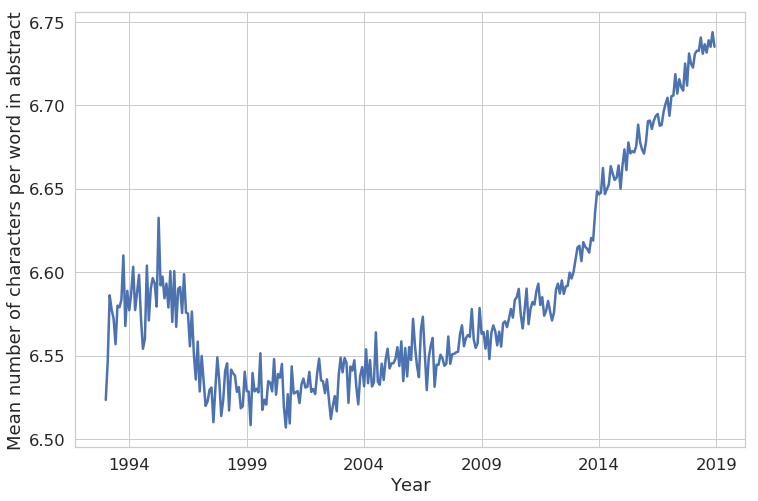

In [35]:
fig = df_all.groupby(pd.Grouper(freq='M')).chars_per_word_abs.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean number of characters per word in abstract")
l = fig.set_xlabel("Year")

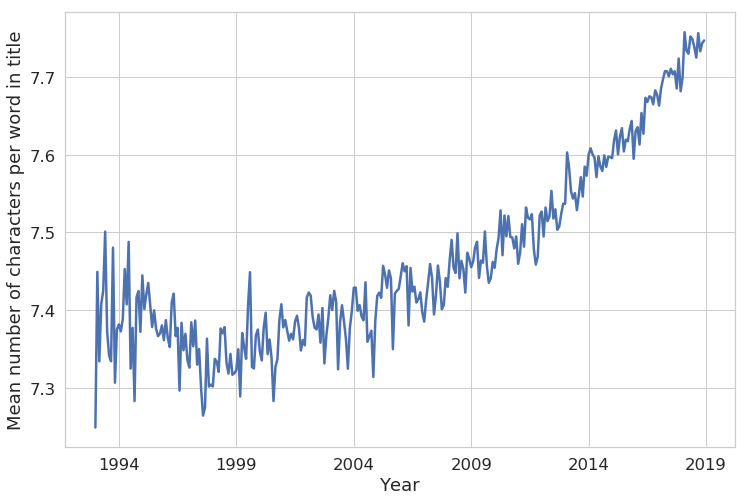

In [36]:
fig = df_all.groupby(pd.Grouper(freq='M')).chars_per_word_title.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean number of characters per word in title")
l = fig.set_xlabel("Year")

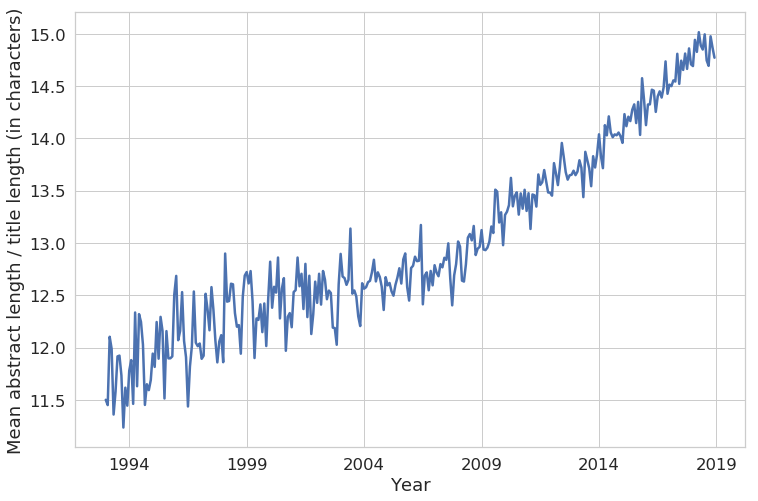

In [37]:
fig = df_all.groupby(pd.Grouper(freq='M')).abs_title_ratio_chars.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean abstract length / title length (in characters)")
l = fig.set_xlabel("Year")

In [38]:
monthly_title_len = pd.DataFrame(df_all.groupby(pd.Grouper(freq='M')).title_len.mean()).reset_index(level=0)

monthly_title_len[0:5]

monthly_title_len.columns = ["date","title_len"]

In [39]:
def to_ym(dt):
    try:
        return dt.strftime("%Y-%m")
    except:
        return ""

Text(0.2, 0.82, '$r^2$=0.970')

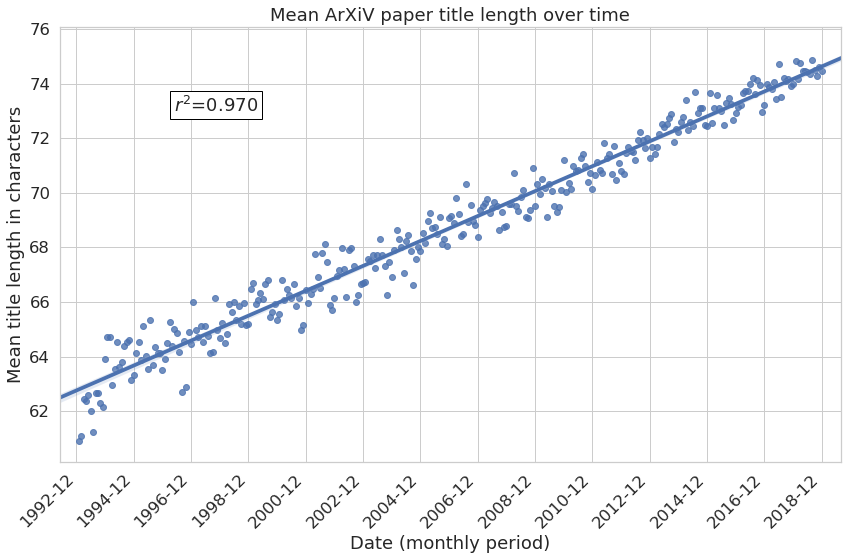

In [40]:
df = monthly_title_len
df['date_f'] = pd.factorize(df['date'])[0] + 1
mapping = dict(zip(df['date_f'], df['date'].dt.date))

fig, ax = plt.subplots(figsize=[14,8])

sns.regplot('date_f', 'title_len', data=df, ax=ax, fit_reg=True, ci=95)

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(24))

ax.set_xlim([-7,320])
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('').apply(to_ym)
labels[1] = "1992-12"
labels[14] = "2018-12"
l = ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_title("Mean ArXiV paper title length over time")
plt.xlabel("Date (monthly period)")
plt.ylabel("Mean title length in characters")

from scipy import stats
r2 = stats.pearsonr(monthly_title_len.date_f, monthly_title_len.title_len)[0] ** 2
s = "$r^2$=" + str(r2)[0:5]
bbox_dict = dict(facecolor='white', edgecolor='black', alpha=1)
plt.text(.2,.82,s,
         fontsize=18,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes,
         bbox=bbox_dict)

In [41]:
monthly_abs_len = pd.DataFrame(df_all.groupby(pd.Grouper(freq='M')).abs_len.mean()).reset_index(level=0)

monthly_abs_len.columns = ["date","title_len"]

Text(0.2, 0.82, '$r^2$=0.953')

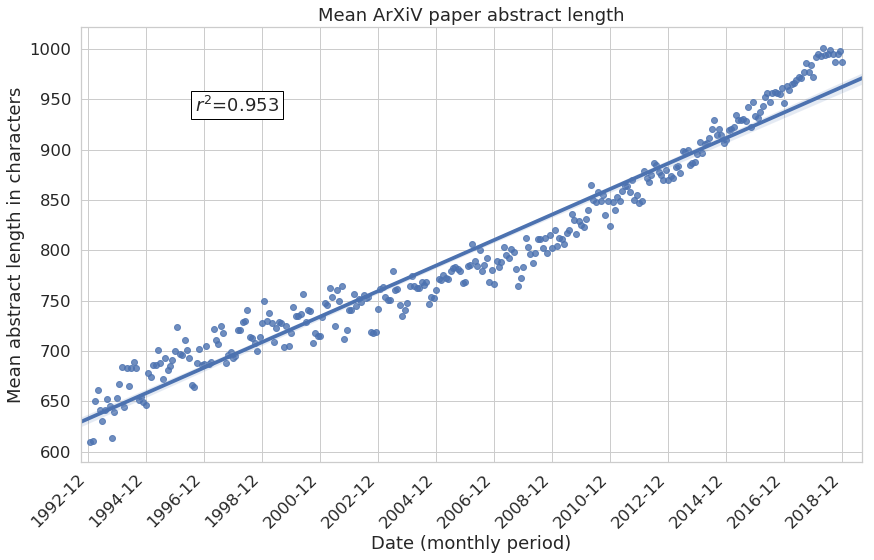

In [42]:
df = monthly_abs_len
df['date_f'] = pd.factorize(df['date'])[0] + 1
mapping = dict(zip(df['date_f'], df['date'].dt.date))

fig, ax = plt.subplots(figsize=[14,8])

sns.regplot('date_f', 'title_len', data=df, ax=ax, fit_reg=True, ci=95)

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(24))

ax.set_xlim([-3,320])
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('').apply(to_ym)
labels[1] = "1992-12"
labels[14] = "2018-12"
l = ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_title("Mean ArXiV paper abstract length")
plt.xlabel("Date (monthly period)")
plt.ylabel("Mean abstract length in characters")

from scipy import stats

r2 = stats.pearsonr(monthly_abs_len.date_f, monthly_abs_len.title_len)[0] ** 2
s = "$r^2$=" + str(r2)[0:5]
bbox_dict = dict(facecolor='white', edgecolor='black', alpha=1)

plt.text(.2,.82,s,
         fontsize=18,
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes,
         bbox=bbox_dict)

Text(0.5, 1.0, 'Length of ArXiV paper titles over time')

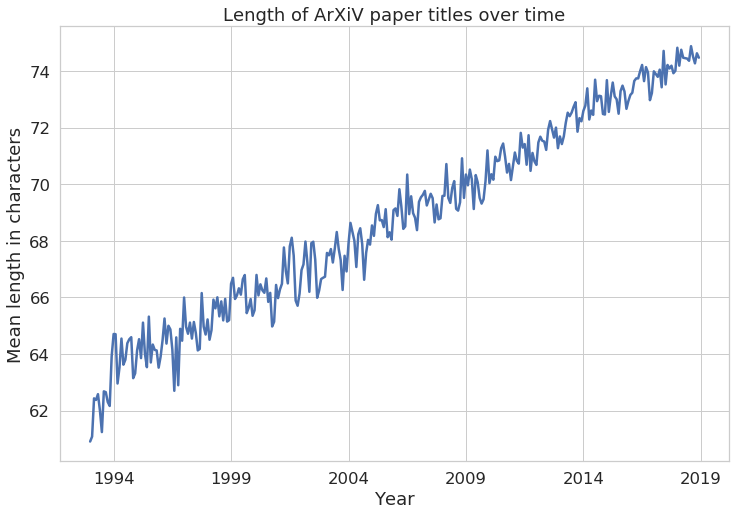

In [43]:
fig = df_all.groupby(pd.Grouper(freq='M')).title_len.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean length in characters")
l = fig.set_xlabel("Year")
fig.set_title("Length of ArXiV paper titles over time")

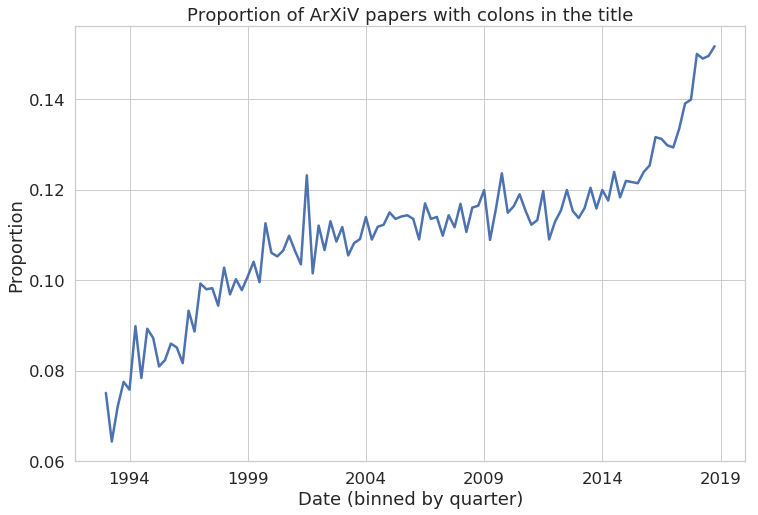

In [44]:
fig = df_all.groupby(pd.Grouper(freq='Q')).has_colon_title.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Proportion")
l = fig.set_xlabel("Date (binned by quarter)")
l = fig.set_title("Proportion of ArXiV papers with colons in the title")

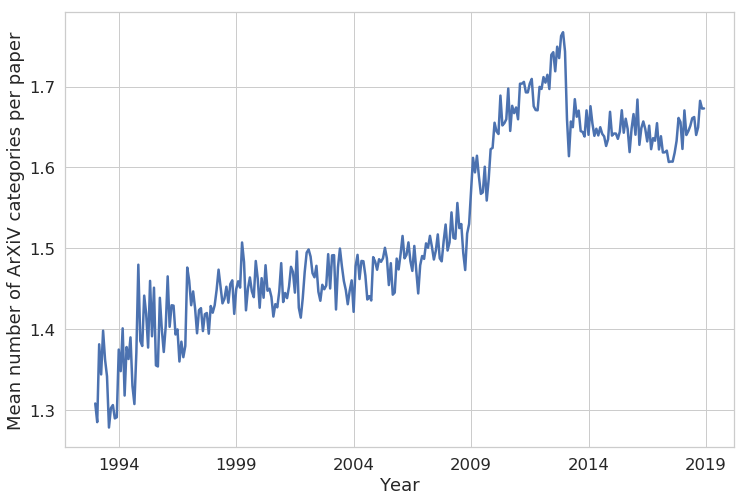

In [45]:
fig = df_all.groupby(pd.Grouper(freq='M')).num_categories.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Mean number of ArXiV categories per paper")
l = fig.set_xlabel("Year")

## Text analysis

### Functions for text matching

In [46]:
def search_count(df,pattern,period="year"):
    """
    Helper function for search_counts. Takes a dataframe and a string pattern and
    returns the yearly proportion of items that match the string (case insensitive).
        
    """
      
    
    df_temp = df
    
    
    df_temp['search_abs'] = df_temp['abstract'].str.lower().str.contains(pattern)
    df_temp['search_title'] = df_temp['title'].str.lower().str.contains(pattern)

    
    
    df_temp.search_abs.replace(to_replace=False, value=0, inplace=True)
    df_temp.search_abs.replace(to_replace=True, value=1, inplace=True)
    
    df_temp.search_title.replace(to_replace=False, value=0, inplace=True)
    df_temp.search_title.replace(to_replace=True, value=1, inplace=True)
    
    yearly_matches = df_temp.query('search_abs == 1 or search_title == 1').created_ts.dt.year.value_counts().sort_index().fillna(0)
    yearly_all = df_temp.created_ts.dt.year.value_counts().sort_index().fillna(0)
    
    df = (yearly_matches/yearly_all).rename(pattern).fillna(0)
    
    return df


In [47]:
def search_counts(df,pattern_str_or_list,period="year"):
    """
    Main function for search_counts. Takes a dataframe and a string pattern or list
    of string patterns and returns the yearly proportion of items that match the string
    in a pandas DataFrame.
        
    """
    
    
    if type(pattern_str_or_list) is not list:
        df = pd.DataFrame(search_count(df,pattern_str_or_list))
        df.index.rename("year",inplace=True)
        return df.loc[(df!=0).any(1)]
    
    else:
        pattern_list = []
        for item in pattern_str_or_list:
            pattern_list.append(search_count(df,item).rename(item))
        
        df = pd.DataFrame(pattern_list).transpose()
        df.index.rename("year",inplace=True)
        
        return df.loc[(df!=0).any(1)] # remove all rows with all zeros


### Example queries

In [48]:
d = search_counts(df_all, ["reprod","open","replic"])
d

,reprod,open,replic
year,,,
1993,0.022295,0.023781,0.001189
1994,0.023302,0.020129,0.004165
1995,0.024858,0.021933,0.003540
1996,0.023307,0.023181,0.003213
1997,0.025942,0.024566,0.003364
1998,0.024820,0.024903,0.003847
1999,0.026396,0.027515,0.003864
2000,0.024746,0.030419,0.004010
2001,0.023787,0.029129,0.003200


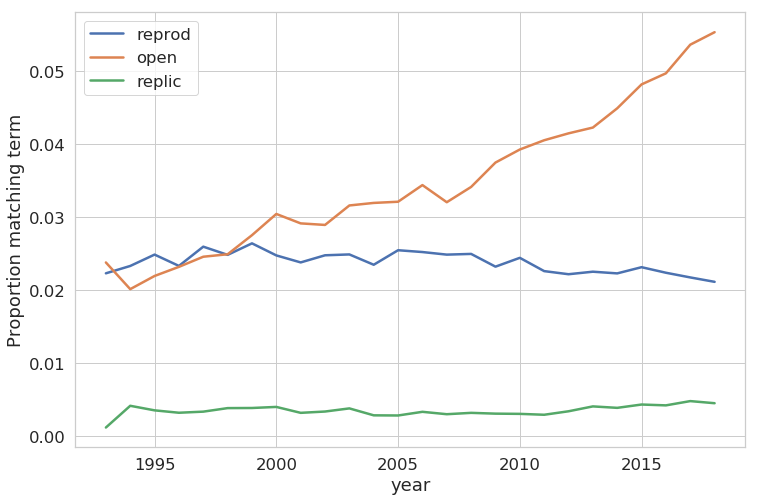

In [49]:
fig = d.plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")


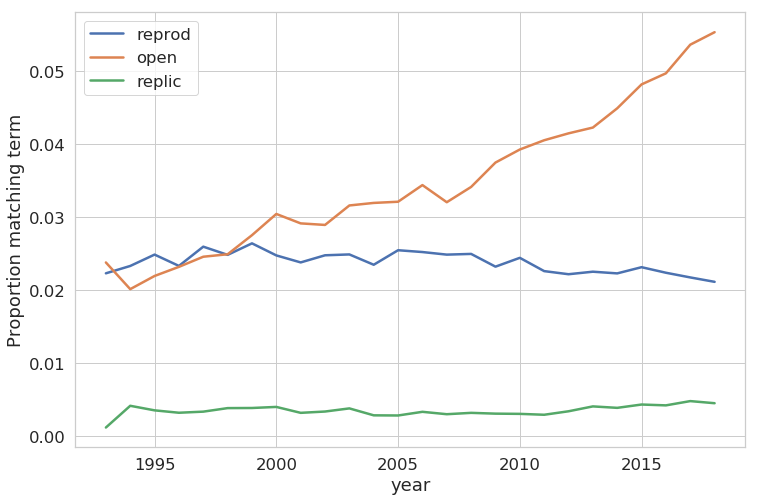

In [50]:
terms = ["reprod","open","replic"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

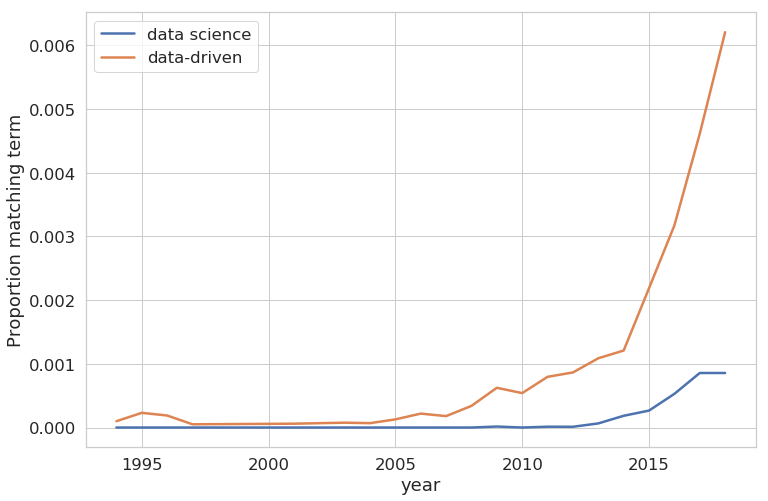

In [51]:
terms = ["data science","data-driven"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

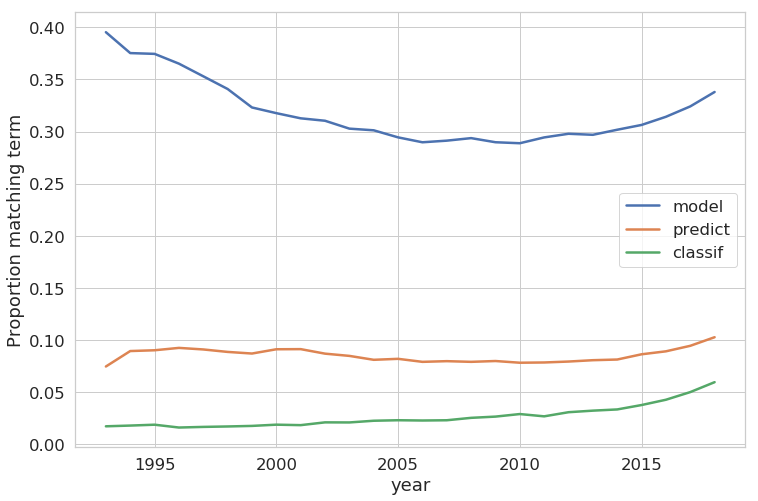

In [52]:
terms = ["model","predict","classif"]
fig = search_counts(df_all,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

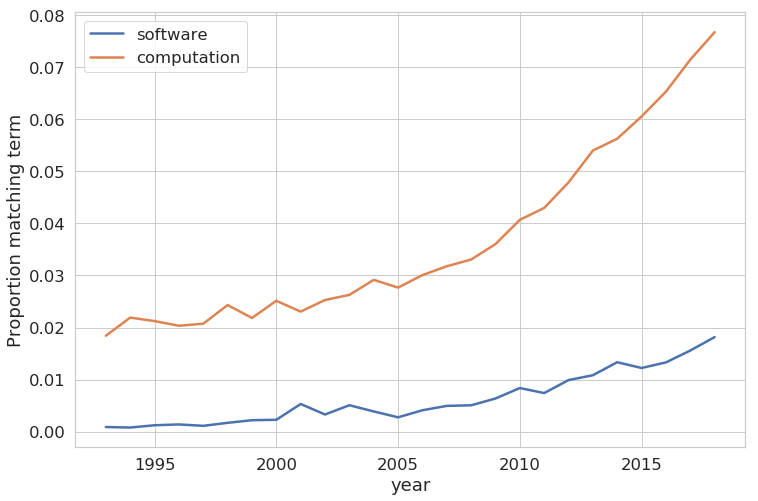

In [53]:
terms = ["software","computation"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

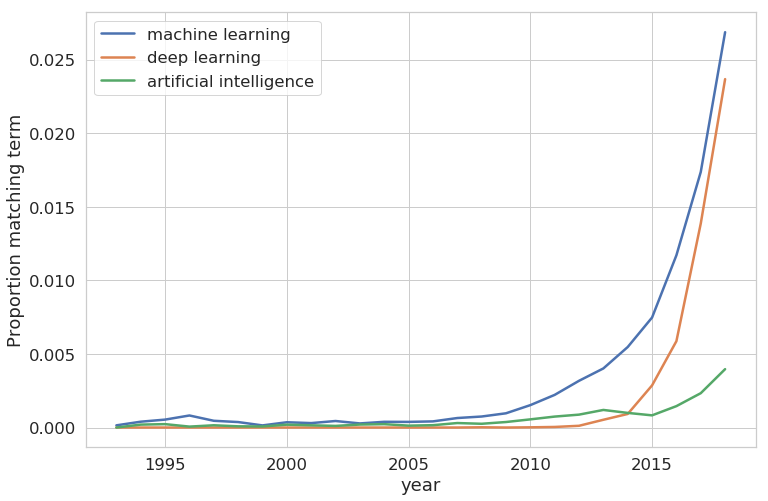

In [54]:
terms = ["machine learning","deep learning","artificial intelligence"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

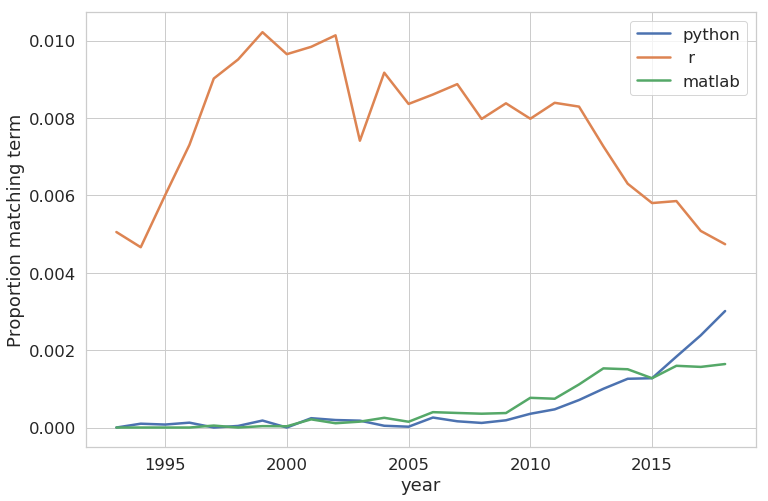

In [55]:
terms = ["python"," r ","matlab"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

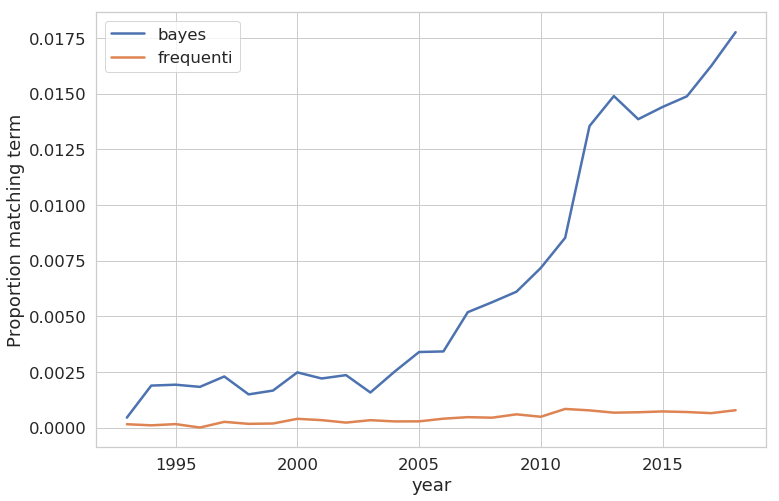

In [56]:
terms = ["bayes","frequenti"]
fig = search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

## Searching a specific category

Create a new dataframe by filtering the `categories` variable. If you're filtering from df_all, you shouldn't need to drop duplicates, but it is good to be safe.

In [57]:
df_astro = df_all[df_all.categories.str.contains("astro")].copy()

In [58]:
len(df_astro)

248376

In [59]:
df_astro = df_astro.drop_duplicates()
len(df_astro)

248376

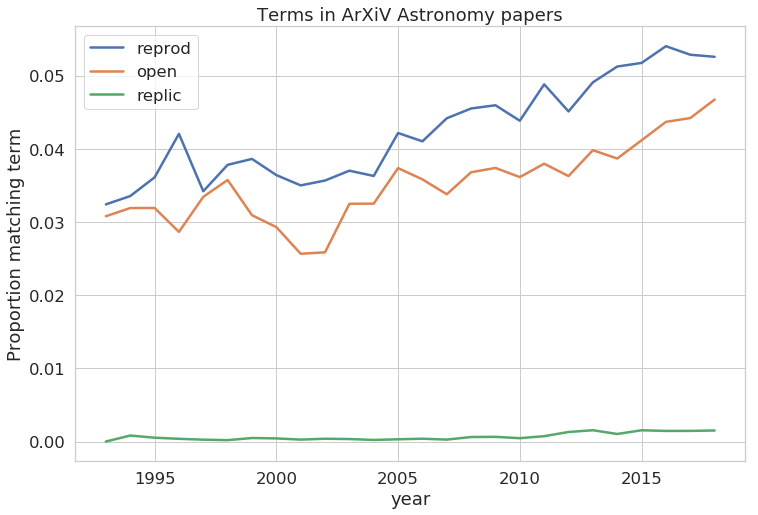

In [60]:
terms = ["reprod","open","replic"]
fig = search_counts(df_astro, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")
title = fig.set_title("Terms in ArXiV Astronomy papers")

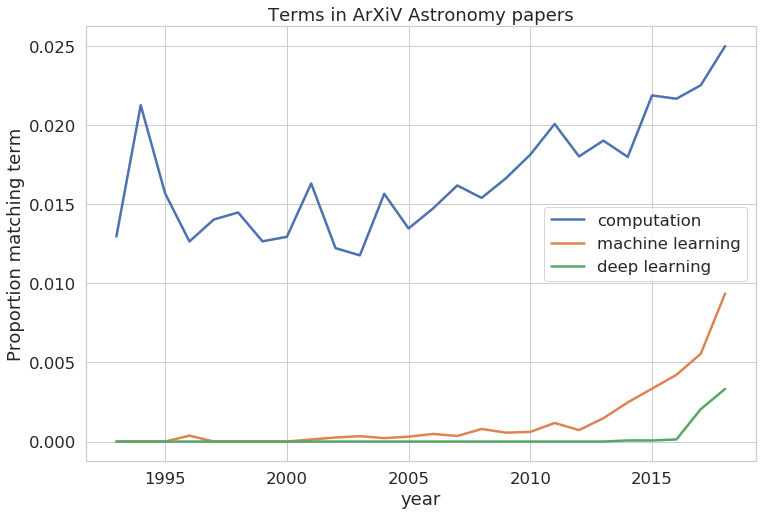

In [61]:
terms = ["computation","machine learning","deep learning"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")
title = fig.set_title("Terms in ArXiV Astronomy papers")

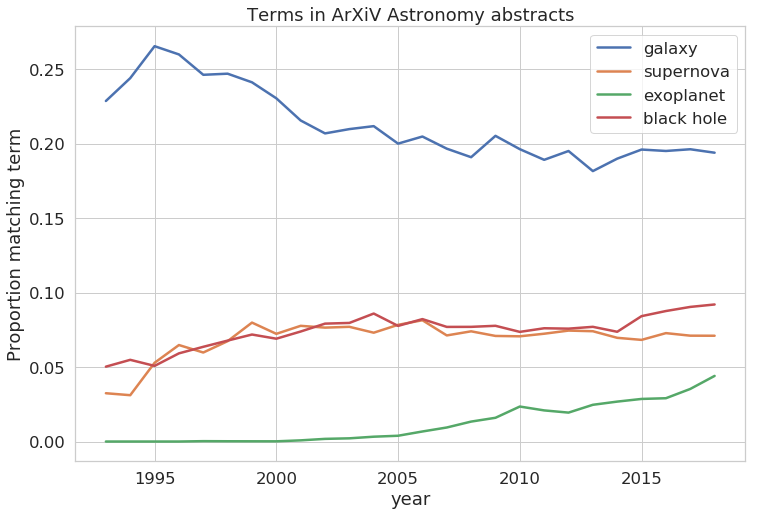

In [62]:
terms = ["galaxy","supernova","exoplanet","black hole"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")
title = fig.set_title("Terms in ArXiV Astronomy abstracts")

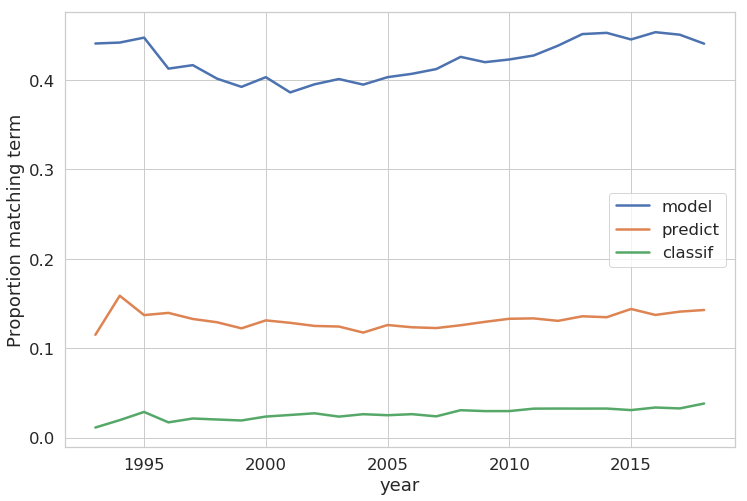

In [63]:
terms = ["model","predict","classif"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

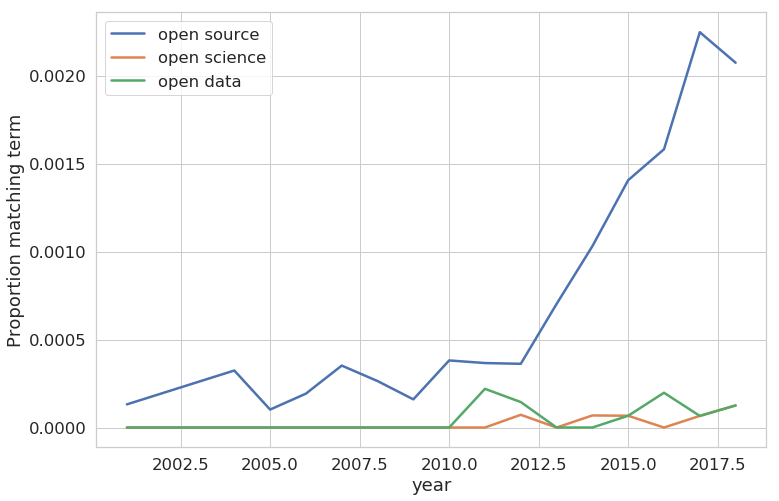

In [64]:
terms = ["open source","open science","open data"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

## Searching multiple categories

If you're using this method instead of searching, you must drop duplicates, as papers are included in a category if they are posted or cross-posted.

In [65]:
categories = ["cs.AI", "cs.LG", "stat.ML", "cs.SI", "cs.CL", "cs.CY"]

In [66]:
df_cat_list = []
for cat in categories:
    df_cat_list.append(df_all[df_all.categories.str.contains(cat)].copy())
    
df_cats = pd.concat(df_cat_list)

In [67]:
len(df_cats)

92996

In [68]:
df_cats = df_cats.drop_duplicates()
len(df_cats)

66319

In [69]:
df_cats.sample(3).transpose()

created_ts,2018-03-23 00:00:00,1997-05-31 00:00:00,2015-08-20 00:00:00
abstract,Automated techniques such as model checking ha...,Several recent studies have compared the relat...,We consider the problem of identifying pattern...
acm_class,NaN,NaN,NaN
arxiv_id,1803.08966,cs/9706101,1508.04887
author_text,"Lu Feng, Mahsa Ghasemi, Kai-Wei Chang, Ufuk Topcu","M. E. Pollack, D. Joslin, M. Paolucci","Ko-Jen Hsiao, Kevin S. Xu, Jeff Calder, Alfred..."
categories,"cs.RO,cs.CL,cs.FL",cs.AI,"cs.CV,cs.LG,stat.ML"
comments,Accepted for publication in International Conf...,See http://www.jair.org/ for an online appendi...,The work is submitted to IEEE TNNLS Special Is...
created,2018-03-23 00:00:00,1997-05-31 00:00:00,2015-08-20 00:00:00
doi,NaN,NaN,10.1109/TNNLS.2015.2466686
num_authors,4,3,4
num_categories,3,1,3


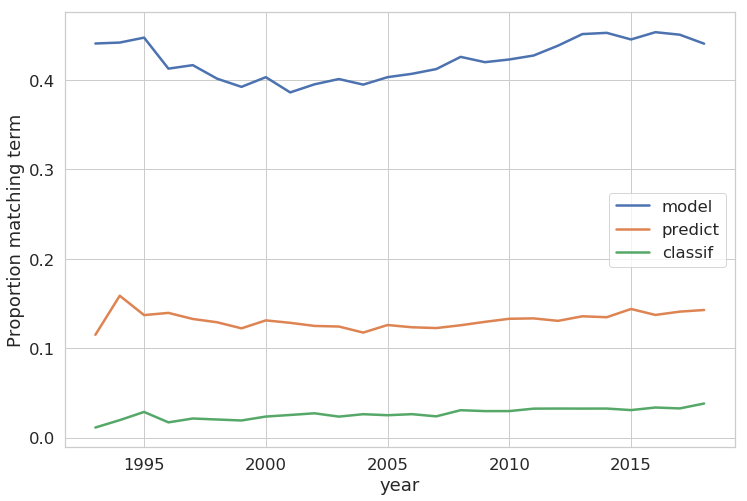

In [70]:
terms = ["model","predict","classif"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

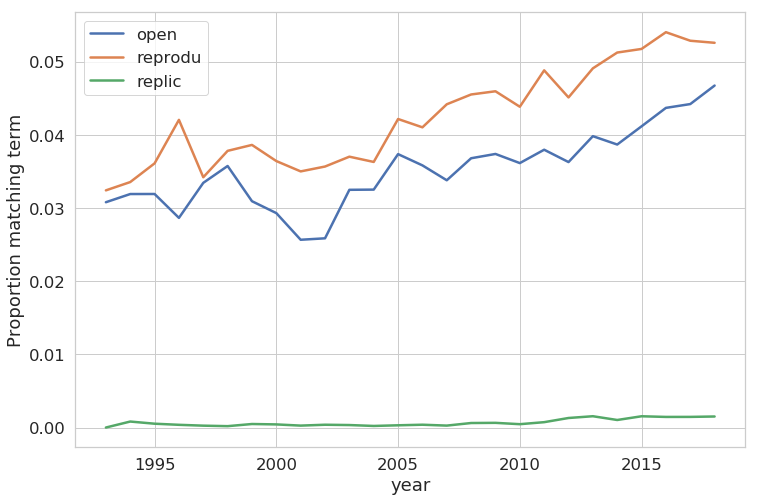

In [71]:
terms = ["open","reprodu","replic"]
fig = search_counts(df_astro,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

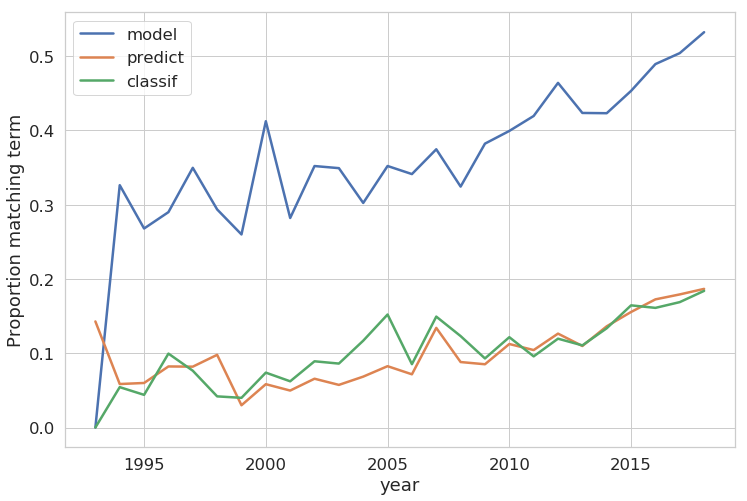

In [72]:
terms = ["model","predict","classif"]
fig = search_counts(df_cats,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

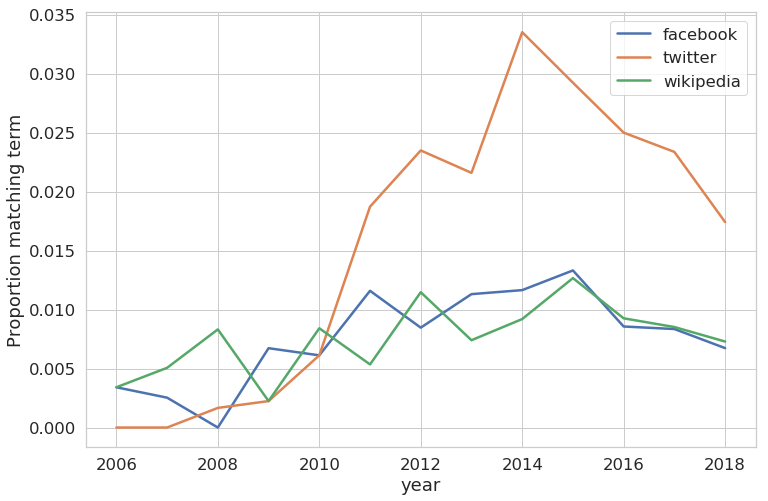

In [73]:
terms = ["facebook","twitter","wikipedia"]
fig = search_counts(df_cats,terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

## Author names analysis

### Most common last names

In [74]:
def last_name(name):
    name_split = name.split(" ")
    return name_split[len(name_split)-1]
        

In [75]:
def first_name(name):
    name_split = name.split(" ")
    return name_split[0]
        

In [76]:
allnames = []
count = 0
for paper in df_all.iterrows():
    for author in paper[1].author_text.split(", "):
        allnames.append(last_name(author))
    count += 1
    if count % 100000 == 0:
        print(count)

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


In [77]:
allnames_s = pd.Series(allnames)
allnames_s.value_counts()[0:50]

Wang             48079
Zhang            43497
Li               40256
Liu              32447
Chen             30110
Kim              20476
Lee              19184
Yang             18149
Wu               15214
Xu               14802
Collaboration    13919
Huang            12826
Zhou             12127
Zhao             12005
Zhu              10768
Sun              10593
Smith            10071
Yu                9312
Lin               9013
Ma                8918
Lu                8578
Hu                8013
Guo               7431
He                6954
Park              6905
Jiang             6703
Gao               6142
Singh             5996
Kumar             5819
Williams          5727
Han               5600
Martin            5575
Zheng             5541
Shen              5538
Schmidt           5410
Luo               5204
Song              5105
Yuan              5085
Yan               5054
Chang             4930
Jones             4906
Silva             4903
Johnson           4866
Tang       

### Papers with authors including "Collaboration" or "Consortium" 

In [78]:
def author_search_count(df,pattern,period="year"):
    """
    Helper function for author_search_counts. Takes a dataframe and a string pattern and
    returns the yearly proportion of items that match the string (case insensitive).
        
    """
      
    
    df_temp = df
    
    
    df_temp['search_author'] = df_temp['author_text'].str.lower().str.contains(pattern)
    
    
    df_temp.search_author.replace(to_replace=False, value=0, inplace=True)
    df_temp.search_author.replace(to_replace=True, value=1, inplace=True)
    
    yearly_matches = df_temp.query('search_author == 1').created_ts.dt.year.value_counts().sort_index().fillna(0)
    yearly_all = df_temp.created_ts.dt.year.value_counts().sort_index().fillna(0)
    
    df = (yearly_matches/yearly_all).rename(pattern).fillna(0)
    
    return df


In [79]:
def author_search_counts(df,pattern_str_or_list,period="year"):
    """
    Main function for author_search_counts. Takes a dataframe and a string pattern or list
    of string patterns and returns the yearly proportion of items that match the string
    in a pandas DataFrame.
        
    """
    
    
    if type(pattern_str_or_list) is not list:
        df = pd.DataFrame(search_count(df,pattern_str_or_list))
        df.index.rename("year",inplace=True)
        return df.loc[(df!=0).any(1)]
    
    else:
        pattern_list = []
        for item in pattern_str_or_list:
            pattern_list.append(author_search_count(df,item).rename(item))
        
        df = pd.DataFrame(pattern_list).transpose()
        df.index.rename("year",inplace=True)
        
        return df.loc[(df!=0).any(1)] # remove all rows with all zeros


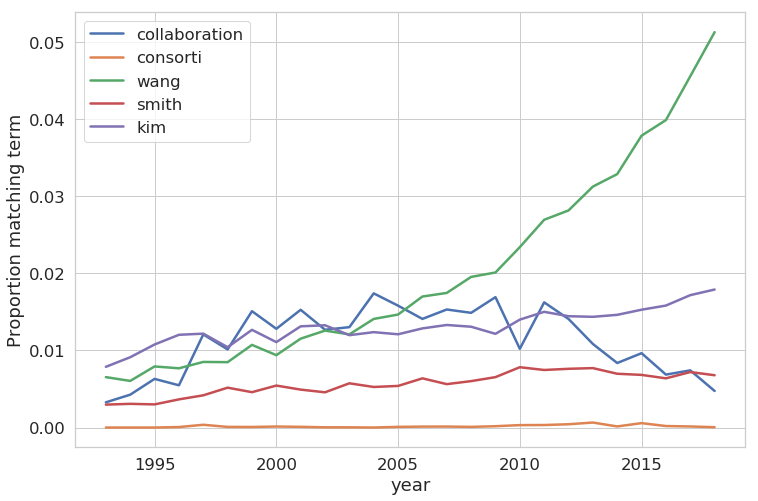

In [80]:
terms = ["collaboration","consorti","wang","smith","kim"]
fig = author_search_counts(df_all, terms).plot(kind='line', figsize=[12,8])
label = fig.set_ylabel("Proportion matching term")

### Proportion of authors who use initials vs full first names

In [81]:
def first_author_initials(s):
    if s.split(", ")[0].find(".") > -1:
        return 1
    else:
        return 0

In [82]:
def all_author_initials(s):
    initials_count = 0
    for author in s.split(", "):
        if author.find(".") > -1:
            initials_count += 1
            
    return initials_count/len(s.split(", "))

In [83]:
df_all['first_author_initials'] = df_all.author_text.apply(first_author_initials)

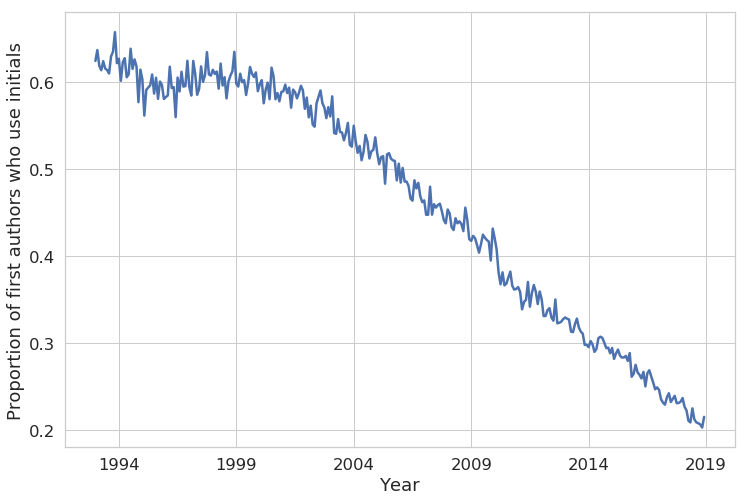

In [84]:
fig = df_all.groupby(pd.Grouper(freq='M')).first_author_initials.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Proportion of first authors who use initials")
l = fig.set_xlabel("Year")

In [85]:
df_all['all_author_initials'] = df_all.author_text.apply(all_author_initials)

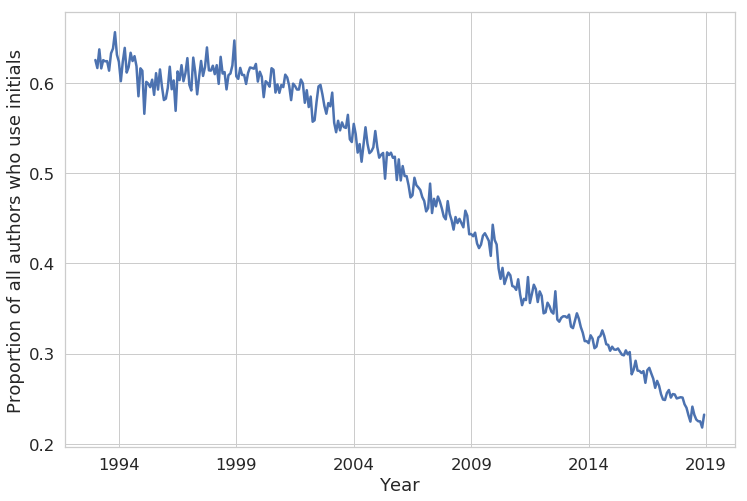

In [86]:
fig = df_all.groupby(pd.Grouper(freq='M')).all_author_initials.mean().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Proportion of all authors who use initials")
l = fig.set_xlabel("Year")

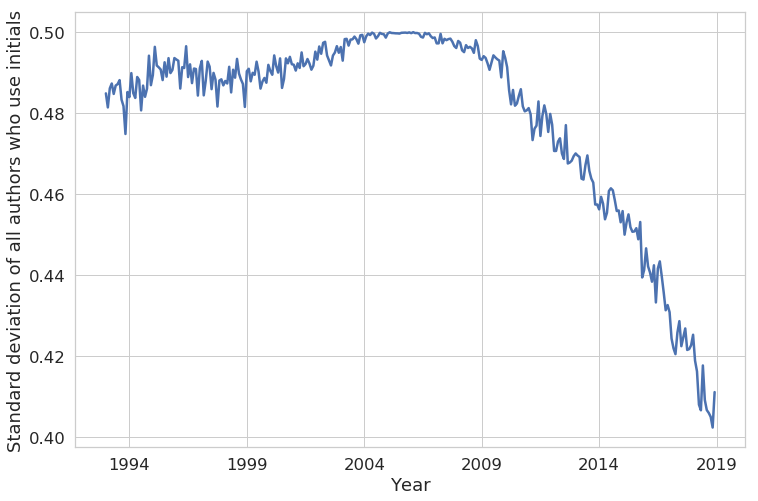

In [87]:
fig = df_all.groupby(pd.Grouper(freq='M')).first_author_initials.std().plot(kind='line', figsize=[12,8])
l = fig.set_ylabel("Standard deviation of all authors who use initials")
l = fig.set_xlabel("Year")

In [88]:
time_elapsed(start)

'Total runtime: 7 minutes, 4 seconds'